## Предобработка данных

In [1]:
import pandas as pd
import os
import re
import matplotlib.font_manager
pd.set_option('display.max_rows', 500)
import scipy
from scipy.stats import skew
from scipy.stats import kurtosis
import math
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.backends.backend_pgf import FigureCanvasPgf
mpl.backend_bases.register_backend('pdf', FigureCanvasPgf)
from matplotlib import rc
rc('text.latex',preamble=r'\usepackage[utf8]{inputenc}')
rc('text.latex',preamble=r'\usepackage[russian]{babel}')
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif"
})

import seaborn as sns
import numpy as np
from sklearn import preprocessing
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('../../data/final_data.csv')

In [3]:
df['salary_from'] = df['salary_from'].fillna(0)
df['salary_to'] = df['salary_to'].fillna(0)
df['salary'] = df.loc[:,'salary_from'] + df.loc[:,'salary_to']
df.loc[(df.salary_from != 0) & (df.salary_to != 0), 'salary'] = df.salary / 2

In [4]:
df.loc[df.gross == False, 'salary'] = df.salary * 0.87

In [5]:
df.dropna(axis = 0, subset = ['currency', 'gross'], inplace = True)

In [6]:
df.drop(['raw', 'schedule', 'employer', 'salary_from', 'salary_to', 'gross'], axis = 1, inplace = True)

In [7]:
df.drop('employment', axis = 1, inplace = True) 

In [8]:
df.shape

(30639, 11)

In [9]:
df.isna().sum()

premium                         0
name                            0
response_letter_required        0
city                        10502
latitude                    10367
longtitude                  10367
experience                      0
skills                       5989
has_test                        0
currency                        0
salary                          0
dtype: int64

In [10]:
df = df.loc[~(df.salary == 0)]
df = df.loc[~(df.latitude == 0)]
df = df.loc[~(df.longtitude == 0)]
df.loc[(df.salary < 1000) & (df.currency == 'RUR'), 'salary'] = df.loc[(df.salary < 1000) & (df.currency == 'RUR'), 'salary'] * 1000

In [11]:
df.salary.value_counts()

43500.0     1575
52200.0     1408
34800.0     1226
60900.0     1152
87000.0     1103
            ... 
31224.3        1
176000.0       1
20900.0        1
45600.0        1
184875.0       1
Name: salary, Length: 1337, dtype: int64

In [12]:
df.dropna(axis = 0, subset = ['latitude', 'longtitude'], inplace = True)

In [13]:
df.shape

(20144, 11)

In [14]:
import pickle 
import matplotlib.path as mplPath

In [15]:
mapper = {
"Алтайский край":"Южно-Сибирский",
"Республика Алтай":"Южно-Сибирский",
"Курская область":"Центрально-Чернозёмный",
"Тульская область":"Центральный",
"Пермский край":"Волго-Камский",
"Тверская область":"Центральный",
"Липецкая область":"Центрально-Чернозёмный",
"Орловская область":"Центральный",
"Самарская область":"Волго-Уральский",
"Кировская область":"Волго-Камский",
"Брянская область":"Центральный",
"Московская область":"Центральный",
"Смоленская область":"Центральный",
"Рязанская область":"Центральный",
"Калужская область":"Центральный",
"Тамбовская область":"Центрально-Чернозёмный",
"Ростовская область":"Южный",
"Республика Марий Эл":"Волго-Камский",
"Курганская область":"Уральско-Сибирский",
"Мурманская область":"Северно-Западный",
"Республика агестан":"Северно-Кавказский",
"Республика Карелия":"Северно-Западный",
"Ивановская область":"Центральный",
"Кемеровская область":"Южно-Сибирский",
"Вологодская область":"Северно-Западный",
"Магаданская область":"Дальневосточный",
"Республика Татарстан":"Волго-Камский",
"Воронежская область":"Центрально-Чернозёмный",
"Белгородская область":"Центрально-Чернозёмный",
"Ярославская область":"Центральный",
"Ульяновская область":"Волго-Уральский",
"Владимирская область":"Центральный",
"Новосибирская область":"Южно-Сибирский",
"Ленинградская область":"Северно-Западный",
"Астраханская область":"Южный",
"Удмуртская Республика":"Волго-Камский",
"Архангельская область":"Северный",
"Чувашская Республика":"Волго-Камский",
"Республика Калмыкия":"Южный",
"Республика Башкортостан":"Волго-Уральский",
"Республика Саха (Якутия)":"Дальневосточный",
"Кабардино-Балкарская Республика":"Северно-Кавказский",
"Республика Северная Осетия-Алания":"Северно-Кавказский",
"Республика Тыва":"Ангаро-Енисейский",
"Карачаево-Черкесская Республика":"Северно-Кавказский",
"Еврейская автономная область":"Дальневосточный",
"Томская область":"Южно-Сибирский",
"Амурская область":"Дальневосточный",
"Пензенская область":"Волго-Уральский",
"Республика Бурятия":"Дальневосточный",
"Республика Хакасия":"Ангаро-Енисейский",
"Республика Мордовия":"Волго-Камский",
"Саратовская область":"Волго-Уральский",
"Костромская область":"Центральный",
"Республика Ингушетия":"Северно-Кавказский",
"Чеченская Республика":"Северно-Кавказский",
"Калининградская область":"Северно-Западный",
"Псковская область":"Северно-Западный",
"Республика Коми":"Северный",
"Оренбургская область":"Волго-Уральский",
"Новгородская область":"Северно-Западный",
"Челябинская область":"Уральско-Сибирский",
"Ставропольский край":"Северно-Кавказский",
"Свердловская область":"Уральско-Сибирский",
"Волгоградская область":"Южный",
"Республика Адыгея":"Южный",
"Ханты-Мансийский автономный округ":"Уральско-Сибирский",
"Тюменская область":"Уральско-Сибирский",
"Омская область":"Южно-Сибирский",
"Приморский край":"Дальневосточный",
"Хабаровский край":"Дальневосточный",
"Сахалинская область":"Дальневосточный",
"Чукотский автономный округ":"Дальневосточный",
"Красноярский край":"Ангаро-Енисейский",
"Иркутская область":"Ангаро-Енисейский",
"Забайкальский край":"Дальневосточный",
"Камчатский край":"Дальневосточный",
"Ненецкий автономный округ":"Северный",
"Ямало-Ненецкий автономный округ":"Уральско-Сибирский",
"Республика Дагестан":"Северно-Кавказский",
"Краснодарский край":"Южный",
"Нижегородская область":"Волго-Камский",
"Неизвестно" : "Неизвестно" }

In [16]:
def convert_to_region(lat, long):
    coord = np.array([lat, long])
    for reg, area in loaded_dict.items():
        if area.contains_point(coord):
            return reg
    
    return 'Неизвестно'

with open('../../data/saved_dictionary.pkl', 'rb') as f:
    loaded_dict = pickle.load(f)
    
l = []
for v in loaded_dict.values():
    l.append(mplPath.Path(np.array(v['0'])))
    
loaded_dict = dict(zip(list(loaded_dict.keys()), l))
df.loc[:, 'Region'] = df.apply(lambda x: convert_to_region(x.latitude, x.longtitude), axis = 1)

df.loc[:, 'Region'] = df.loc[:, "Region"].map(mapper)

In [17]:
df.loc[(df["city"].isin(["посёлок Русский","Владивосток","Артёмовский городской округ",
                        "посёлок городского типа Забайкальск","поселок городского типа Забайкальск",
                        "городской округ Владивостокский"])) & (df["Region"] == 'Неизвестно'), "Region"] = "Дальневосточный"
df.loc[(df["city"].isin(["посёлок городского типа Кореиз","село Скворцово","посёлок Розовый",
                        "село Дубки","Керчь","посёлок Волна","Анапа","Евпатория",
                        "Симферополь", "Ялта", "Севастополь", "Таганрог", 
                        "посёлок городского типа Сириус", "Новороссийск","Дербент",
                        "село Яблочное","посёлок городского типа Гвардейское","село Белоглинка",
                        "Избербаш","Махачкала","Республика Крым","посёлок городского типа Красногвардейское",
                        "Сочи","село Фонтаны",])) & (df["Region"] == 'Неизвестно'), "Region"] = "Северно-Кавказский"
df.loc[(df["city"].isin(["Архангельск","Полярный"])) & (df["Region"] == 'Неизвестно'), "Region"] = "Северный"
df.loc[(df["city"].isin(["Санкт-Петербург","Ломоносов","Сосновый Бор"]) & (df["Region"] == 'Неизвестно')) , "Region"] = "Северно-Западный"
df.loc[(df["city"].isin(["посёлок Новый"])) & (df["Region"] == 'Неизвестно'), "Region"] = "Уральский"

df.loc[:, "Region"] = df['Region'].str.replace('^Уральский$','Северный и Уральский')
df.loc[:, "Region"] = df['Region'].str.replace('^Северный$','Северный и Уральский')

In [18]:
skills = [i.split('_') for i in df.skills.astype(str)]

In [19]:
skills = pd.Series([item for sublist in skills for item in sublist]).value_counts()

In [20]:
df.skills = df.skills.astype(str)

In [21]:
for v in skills[1:54].index: 
    df.loc[:, v] = df.skills.str.contains(re.compile('(^|_)' + re.escape(v) + '(_|$)')).astype(int)

In [22]:
df.drop(['city', 'skills'], axis = 1, inplace = True)

In [23]:
df.to_csv('../../data/final_data_salary.csv', index = False)

## Анализ количественных признаков

In [24]:
df = pd.read_csv('../../data/final_data_salary.csv')

In [25]:
df_numeric = df.loc[:, ['latitude', 'longtitude', 'salary']]

In [26]:
df_numeric.describe()

,latitude,longtitude,salary
count,20144.000000,20144.000000,20144.000000
mean,55.031173,50.673507,68379.876190
std,4.115035,23.116306,44461.268023
min,23.608705,-117.780920,739.500000
25%,54.197104,37.544997,40000.000000
50%,55.749451,39.807944,55000.000000
75%,56.837641,57.498475,80805.000000
max,69.496790,158.679625,522000.000000


In [27]:
stats = []

for (i, col) in enumerate(df_numeric.columns):
    val = df_numeric[col]
    
    stats.append ([col, val.mean(), val.median(), val.min(), val.max(), val.std(), 
                     scipy.stats.skew(val, axis=0, bias=True), 
                     kurtosis(val, axis=0, bias=True), 
                     val.quantile(0.05), val.quantile(0.95), 
                     val.quantile(0.75) - val.quantile(0.25),
                     0])

In [28]:
stats = pd.DataFrame(stats, columns=['Переменная', 'Среднее', 'Медиана', 'Минимум', 'Максимум', 
                                     'Ст. Отклонение', 'Асимметрия', 'Эксцесс', 
                                     '5% Проц', '95% Проц', 'Интерквартильный размах', 'Пропущенные наблюдения'])

In [29]:
stats

,Переменная,Среднее,Медиана,Минимум,Максимум,Ст. Отклонение,Асимметрия,Эксцесс,5% Проц,95% Проц,Интерквартильный размах,Пропущенные наблюдения
0,latitude,55.031173,55.749451,23.608705,69.496790,4.115035,-0.999113,2.253621,45.049750,59.971695,2.640537,0
1,longtitude,50.673507,39.807944,-117.780920,158.679625,23.116306,1.800073,3.544598,30.307736,92.981642,19.953478,0
2,salary,68379.876190,55000.000000,739.500000,522000.000000,44461.268023,2.368829,8.604440,26100.000000,156600.000000,40805.000000,0


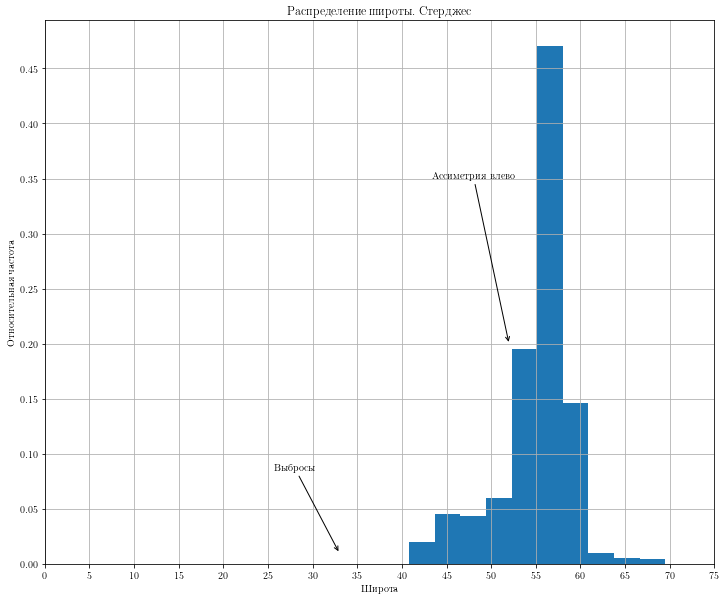

In [30]:
fig, ax = plt.subplots(figsize=(12, 10))
plt.hist(df.latitude, weights = np.ones_like(df.latitude) / len(df.latitude), bins = len(np.histogram_bin_edges(df.latitude, bins='sturges')) - 1) 
plt.ylabel('Относительная частота')
plt.xlabel('Широта')
ax.set_title('Распределение широты. Стерджес')

plt.annotate('Выбросы', xy=(33, 0.01), xytext=(28, 0.085),
             arrowprops={'arrowstyle':'->'}
             ,horizontalalignment='center')

plt.annotate('Ассиметрия влево', xy=(52, 0.2), xytext=(48, 0.35),
             arrowprops={'arrowstyle':'->'}
             ,horizontalalignment='center')

ax.xaxis.set_ticks(np.arange(0, 80, 5))
ax.yaxis.set_ticks(np.arange(0, 0.5, 0.05))

ax.grid()
plt.savefig("sig.pdf")
plt.show()


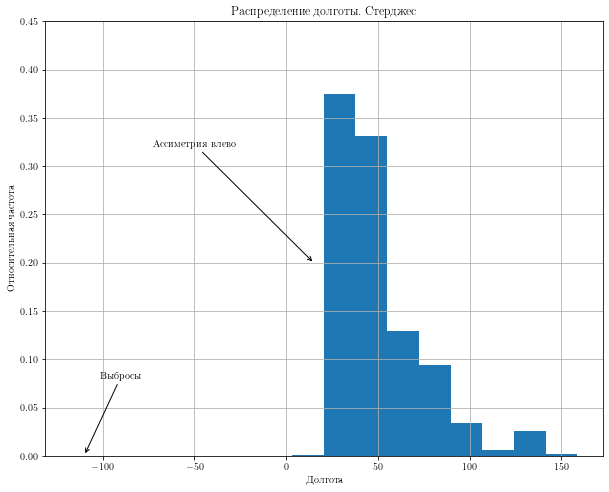

In [31]:
fig, ax = plt.subplots(figsize=(10, 8))
plt.hist(df.longtitude, weights = np.ones_like(df.longtitude) / len(df.longtitude), 
         bins = len(np.histogram_bin_edges(df.longtitude, bins='sturges')) - 1) 
plt.ylabel('Относительная частота')
plt.xlabel('Долгота')
ax.set_title('Распределение долготы. Стерджес')

plt.annotate('Выбросы', xy=(-110, 0.001), xytext=(-90, 0.08),
             arrowprops={'arrowstyle':'->'}
             ,horizontalalignment='center')

plt.annotate('Ассиметрия влево', xy=(15, 0.20), xytext=(-50, 0.32),
             arrowprops={'arrowstyle':'->'}
             ,horizontalalignment='center')


ax.yaxis.set_ticks(np.arange(0, 0.5, 0.05))

ax.grid()
plt.savefig("sig.pdf")
plt.show()

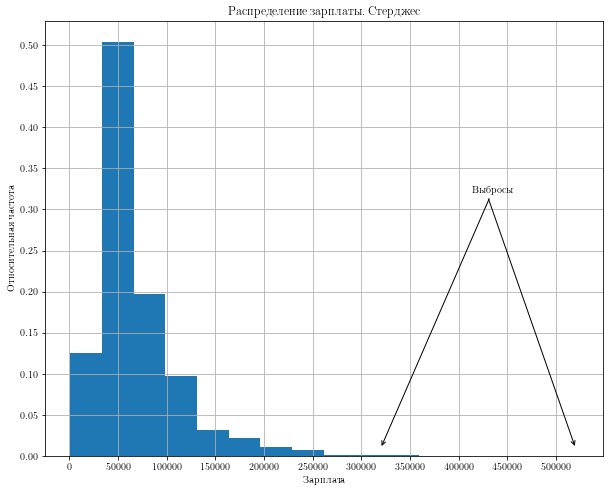

In [32]:
fig, ax = plt.subplots(figsize=(10, 8))

plt.hist(df.salary, weights = np.ones_like(df.salary) / len(df.salary), 
         bins = len(np.histogram_bin_edges(df.salary, bins='sturges')) - 1)

plt.ylabel('Относительная частота')
plt.xlabel('Зарплата')
ax.set_title('Распределение зарплаты. Стерджес')

plt.annotate('Выбросы', xy=(320000, 0.01), xytext=(435000, 0.32),
             arrowprops={'arrowstyle':'->'}
             ,horizontalalignment='center')

plt.annotate('', xy=(520000, 0.01), xytext=(430000, 0.315),
             arrowprops={'arrowstyle':'->'}
             ,horizontalalignment='center')

ax.xaxis.set_ticks(np.arange(0, 550000, 50000))
ax.yaxis.set_ticks(np.arange(0, 0.55, 0.05))

ax.grid()
plt.show()

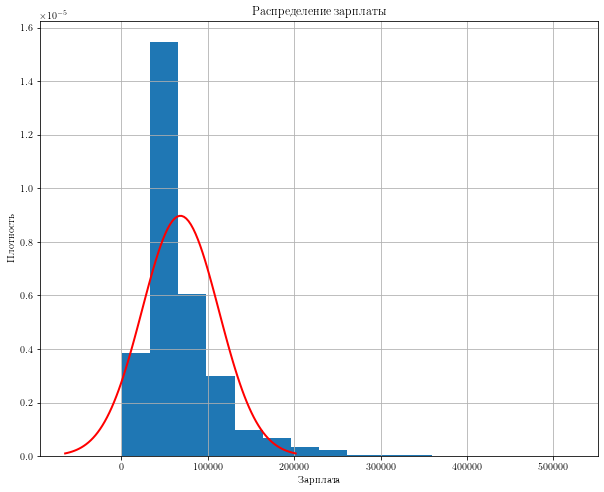

In [33]:
fig, ax = plt.subplots(figsize=(10, 8))

plt.hist(df.salary, density=True, 
         bins = 'sturges')

plt.ylabel('Плотность')
plt.xlabel('Зарплата')
ax.set_title('Распределение зарплаты')

mean = np.mean(df.salary)
std = np.std(df.salary)
x = np.linspace(mean - 3*std, mean + 3*std, 100)
plt.plot(x, 1/(std * np.sqrt(2 * np.pi)) * np.exp( - (x - mean)**2 / (2 * std**2) ), linewidth=2, color='r')

ax.grid()
plt.show()

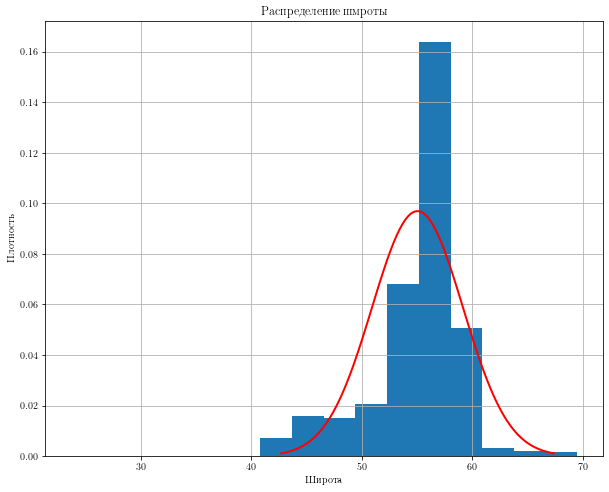

In [34]:
fig, ax = plt.subplots(figsize=(10, 8))

plt.hist(df.latitude, density=True, 
         bins = 'sturges')

plt.ylabel('Плотность')
plt.xlabel('Широта')
ax.set_title('Распределение шмроты')

mean = np.mean(df.latitude)
std = np.std(df.latitude)
x = np.linspace(mean - 3*std, mean + 3*std, 100)
plt.plot(x, 1/(std * np.sqrt(2 * np.pi)) * np.exp( - (x - mean)**2 / (2 * std**2) ), linewidth=2, color='r')

ax.grid()
plt.show()

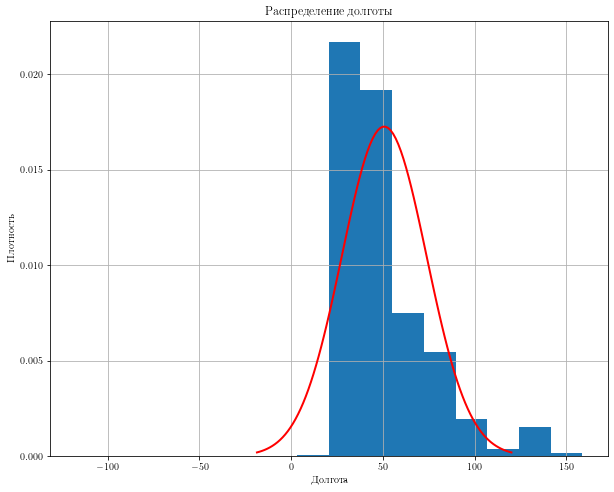

In [35]:
fig, ax = plt.subplots(figsize=(10, 8))

plt.hist(df.longtitude, density=True, 
         bins = 'sturges')

plt.ylabel('Плотность')
plt.xlabel('Долгота')
ax.set_title('Распределение долготы')

mean = np.mean(df.longtitude)
std = np.std(df.longtitude)
x = np.linspace(mean - 3*std, mean + 3*std, 100)
plt.plot(x, 1/(std * np.sqrt(2 * np.pi)) * np.exp( - (x - mean)**2 / (2 * std**2) ), linewidth=2, color='r')

ax.grid()
plt.show()

## Анализ качественных признаков

## Города

В большом количестве(10 тысяч) вакансий город не указан. Такие значения мы заполним категорией "Неизвестно". Города, которые попадаются меньше трех раз мы объеденим в одну категорию "Другие", т.к. в таком случае эта категория получается не такой большой по сравнению с другими категориями. 

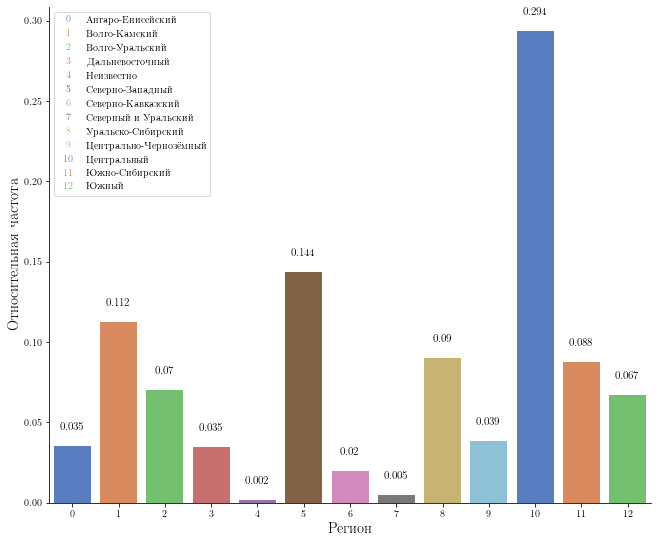

In [36]:
from matplotlib.legend_handler import HandlerBase
from matplotlib.text import Text

class TextHandler(HandlerBase):
    def create_artists(self, legend, tup ,xdescent, ydescent,
                        width, height, fontsize,trans):
        tx = Text(width/2.,height/2,tup[0], fontsize=fontsize,
                  ha="center", va="center", color=tup[1], fontweight="bold")
        return [tx]

le = preprocessing.LabelEncoder()
encoded = pd.Series(le.fit_transform(df.Region))

df1 = encoded.value_counts(normalize=True)
df1 = df1.rename('percent').reset_index()

g = sns.catplot(x='index', y='percent', kind='bar', data=df1, palette='muted')

g.ax.set_xlabel('Регион', fontsize = 15)
g.ax.set_ylabel('Относительная частота', fontsize = 15)

for rect in g.ax.patches:
    g.ax.text (rect.get_x() + rect.get_width()  / 2, rect.get_height() + 0.01, round(rect.get_height(), 3), horizontalalignment='center', fontsize = 11)

handltext = le.transform(le.classes_).astype(str)
labels = le.classes_

t = g.ax.get_xticklabels()
labeldic = dict(zip(handltext, labels))
labels = [labeldic[h.get_text()]  for h in t]
handles = [(h.get_text(),c.get_fc()) for h,c in zip(t,g.ax.patches)]

g.ax.legend(handles, labels, handler_map={tuple : TextHandler()})
g.fig.set_figwidth(10)
g.fig.set_figheight(8)
# tikzplotlib.get_tikz_code(strict=True)
# tikzplotlib.save("../../notes/cities.tex")
plt.show()

## Сопроводительное письмо 

Данная переменная очень сильно не сбалансирована и вакансии, для которых сопроводительное письмо обязательно для ~1% вакансий. 

In [37]:
df.response_letter_required.value_counts()

False    19914
True       230
Name: response_letter_required, dtype: int64

In [38]:
df.response_letter_required = df.response_letter_required.map({False: 0, True: 1}) 

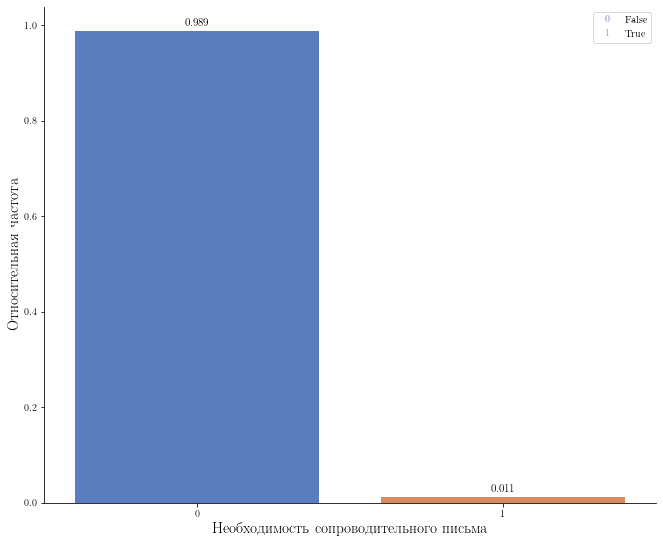

In [39]:
from matplotlib.legend_handler import HandlerBase
from matplotlib.text import Text
from matplotlib.pyplot import figure

class TextHandler(HandlerBase):
    def create_artists(self, legend, tup ,xdescent, ydescent,
                        width, height, fontsize,trans):
        tx = Text(width/2.,height/2,tup[0], fontsize=fontsize,
                  ha="center", va="center", color=tup[1], fontweight="bold")
        return [tx]


df1 = df.response_letter_required.value_counts(normalize=True)
df1 = df1.rename('percent').reset_index()

g = sns.catplot(x='index', y='percent',kind='bar', data=df1, palette='muted')

g.ax.set_xlabel('Необходимость сопроводительного письма', fontsize = 15)
g.ax.set_ylabel('Относительная частота', fontsize = 15)

for rect in g.ax.patches:
    g.ax.text (rect.get_x() + rect.get_width()  / 2, rect.get_height() + 0.01, round(rect.get_height(), 3), horizontalalignment='center', fontsize = 11)

handltext = ['0', '1']
labels = [ "False", "True"]

t = g.ax.get_xticklabels()
labeldic = dict(zip(handltext, labels))
labels = [labeldic[h.get_text()]  for h in t]
handles = [(h.get_text(),c.get_fc()) for h,c in zip(t,g.ax.patches)]

g.ax.legend(handles, labels, handler_map={tuple : TextHandler()}) 
g.fig.set_figwidth(10)
g.fig.set_figheight(8)

plt.show()

## Тест

Лишь около 1% вакансий требуют прохождение тестового задания для отклика на вакансию, эта переменная очень не сбалансирована

In [40]:
df.has_test.value_counts()

False    19983
True       161
Name: has_test, dtype: int64

In [41]:
df.has_test = df.has_test.map({False: 0, True: 1})

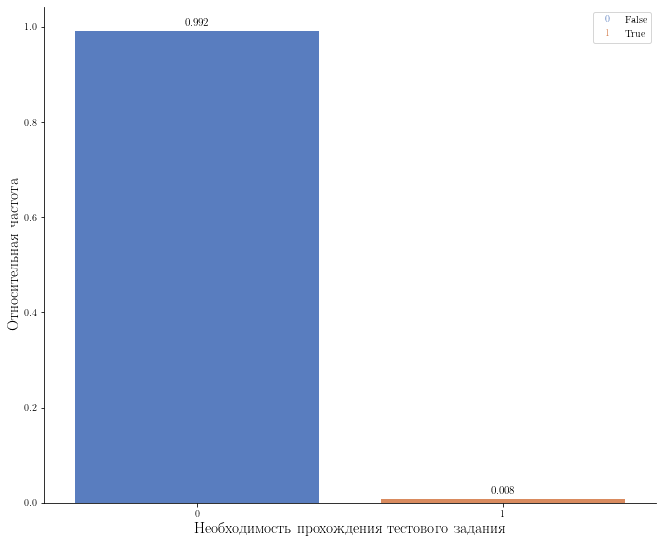

In [42]:
from matplotlib.legend_handler import HandlerBase
from matplotlib.text import Text

class TextHandler(HandlerBase):
    def create_artists(self, legend, tup ,xdescent, ydescent,
                        width, height, fontsize,trans):
        tx = Text(width/2.,height/2,tup[0], fontsize=fontsize,
                  ha="center", va="center", color=tup[1], fontweight="bold")
        return [tx]


df1 = df.has_test.value_counts(normalize=True)
df1 = df1.rename('percent').reset_index()

g = sns.catplot(x='index', y='percent',kind='bar', data=df1, palette='muted')

g.ax.set_xlabel('Необходимость прохождения тестового задания', fontsize = 15)
g.ax.set_ylabel('Относительная частота', fontsize = 15)

for rect in g.ax.patches:
    g.ax.text (rect.get_x() + rect.get_width()  / 2, rect.get_height() + 0.01, round(rect.get_height(), 3), horizontalalignment='center', fontsize = 11)

handltext = ['0', '1']
labels = [ "False", "True"]

t = g.ax.get_xticklabels()
labeldic = dict(zip(handltext, labels))
labels = [labeldic[h.get_text()]  for h in t]
handles = [(h.get_text(),c.get_fc()) for h,c in zip(t,g.ax.patches)]

g.ax.legend(handles, labels, handler_map={tuple : TextHandler()})
g.fig.set_figwidth(10)
g.fig.set_figheight(8)

plt.show()

## Опыт работы

Требования к опыту работы несбалансированы

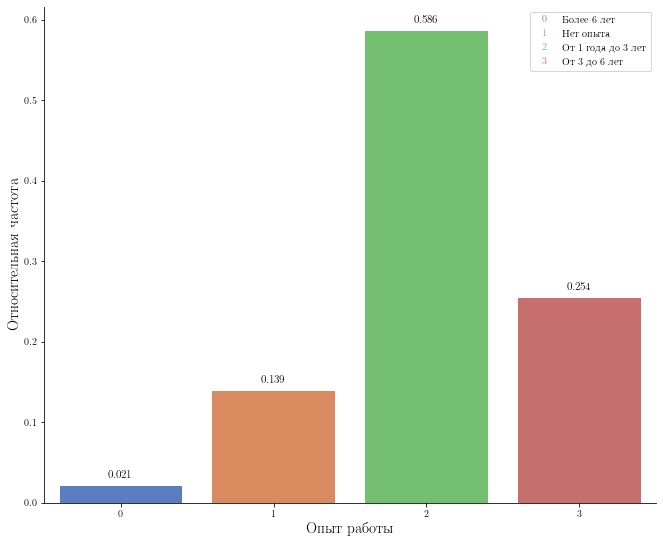

In [43]:
from matplotlib.legend_handler import HandlerBase
from matplotlib.text import Text

class TextHandler(HandlerBase):
    def create_artists(self, legend, tup ,xdescent, ydescent,
                        width, height, fontsize,trans):
        tx = Text(width/2.,height/2,tup[0], fontsize=fontsize,
                  ha="center", va="center", color=tup[1], fontweight="bold")
        return [tx]

le = preprocessing.LabelEncoder()
encoded = pd.Series(le.fit_transform(df.experience))
    
df1 = encoded.value_counts(normalize=True)
df1 = df1.rename('percent').reset_index()

g = sns.catplot(x='index', y='percent',kind='bar', data=df1, palette='muted')

g.ax.set_xlabel('Опыт работы', fontsize = 15)
g.ax.set_ylabel('Относительная частота', fontsize = 15)

for rect in g.ax.patches:
    g.ax.text (rect.get_x() + rect.get_width()  / 2, rect.get_height() + 0.01, round(rect.get_height(), 3), horizontalalignment='center', fontsize = 11)

handltext = le.transform(le.classes_).astype(str)
labels = le.classes_

t = g.ax.get_xticklabels()
labeldic = dict(zip(handltext, labels))
labels = [labeldic[h.get_text()]  for h in t]
handles = [(h.get_text(),c.get_fc()) for h,c in zip(t,g.ax.patches)]

g.ax.legend(handles, labels, handler_map={tuple : TextHandler()})
g.fig.set_figwidth(10)
g.fig.set_figheight(8)

plt.show()

## Навыки

In [44]:
skills = df.iloc[:, 10:].sum(axis = 0)

In [45]:
sums_1c = skills[skills.index.str.contains('1С')].sum()
skills = skills.drop(skills[skills.index.str.contains('1С')].index)
skills.loc['1С'] = sums_1c

skills = skills / skills.values.sum()
skills = skills.sort_values(ascending=False)

In [46]:
skills_df = pd.DataFrame({'ind': range(skills.shape[0]), 'skills': skills.index, 'percent': skills.values})

In [47]:
skills_df

,ind,skills,percent
0,0,1С,0.087936
1,1,Работа в команде,0.081486
2,2,Пользователь ПК,0.066545
3,3,Грамотная речь,0.042663
4,4,Техническое обслуживание,0.031262
5,5,Linux,0.026492
6,6,Работа в условиях многозадачности,0.026132
7,7,SQL,0.023222
8,8,Работа с большим объемом информации,0.023072
9,9,Adobe Photoshop,0.022922


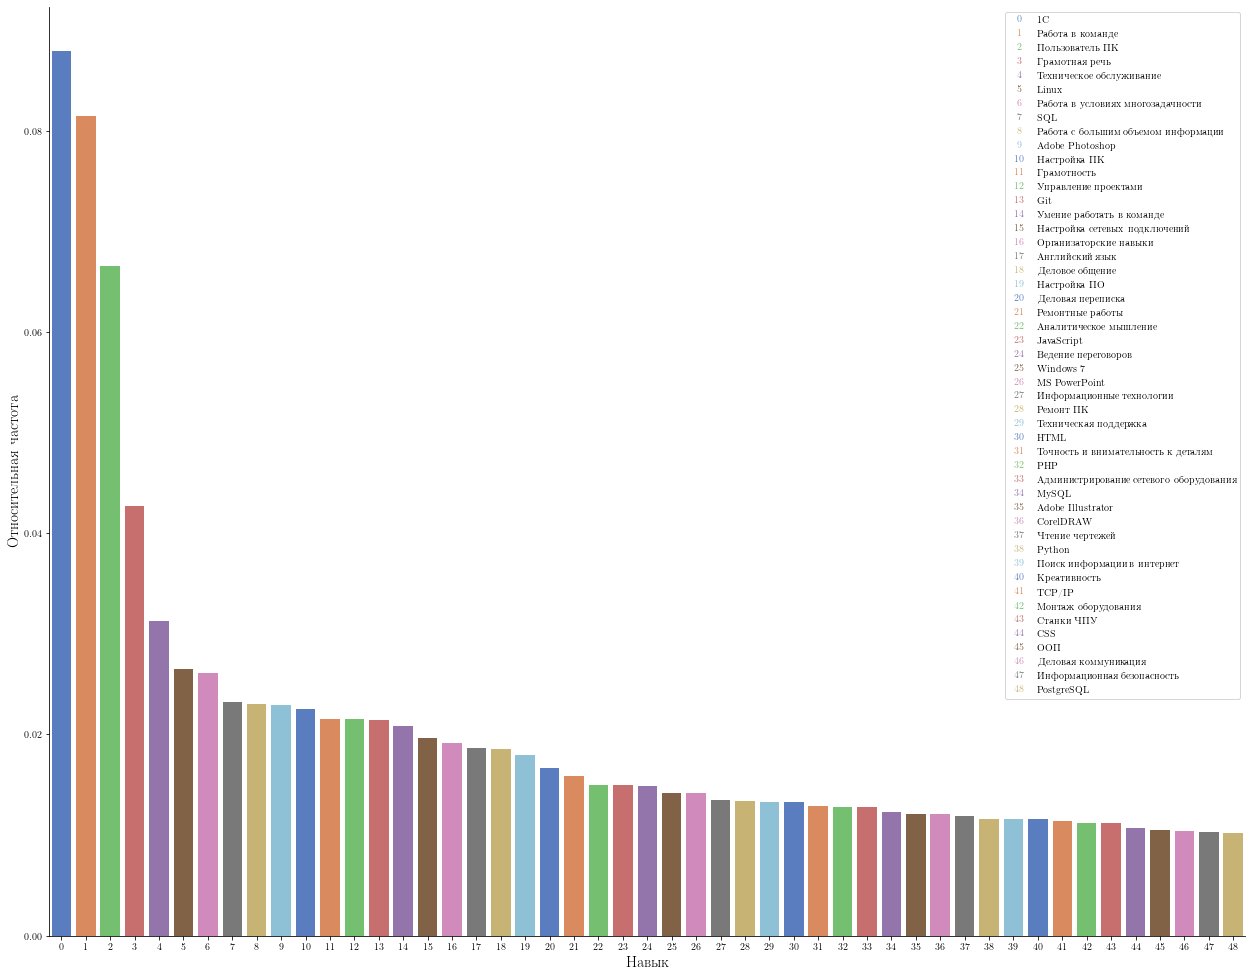

In [48]:
from matplotlib.legend_handler import HandlerBase
from matplotlib.text import Text

class TextHandler(HandlerBase):
    def create_artists(self, legend, tup ,xdescent, ydescent,
                        width, height, fontsize,trans):
        tx = Text(width/2.,height/2,tup[0], fontsize=fontsize,
                  ha="center", va="center", color=tup[1], fontweight="bold")
        return [tx]

g = sns.catplot(data = skills_df, x = 'ind', y = 'percent', kind='bar', palette='muted')

g.ax.set_xlabel('Навык', fontsize = 15)
g.ax.set_ylabel('Относительная частота', fontsize = 15)

handltext = skills_df.ind.astype(str).values
labels = skills_df.skills.values

t = g.ax.get_xticklabels()
labeldic = dict(zip(handltext, labels))
labels = [labeldic[h.get_text()]  for h in t]
handles = [(h.get_text(),c.get_fc()) for h,c in zip(t,g.ax.patches)]

g.ax.legend(handles, labels, handler_map={tuple : TextHandler()})

g.fig.set_figwidth(20)
g.fig.set_figheight(15)

plt.show()

## Гипотезы

In [49]:
skills = [i.split('_') for i in df.skills.astype(str)]

AttributeError: 'DataFrame' object has no attribute 'skills'

In [50]:
skills = pd.Series([item for sublist in skills for item in sublist]).value_counts()

TypeError: 'float' object is not iterable

In [51]:
names = df.name.value_counts()

In [52]:
names[names.index.str.contains('тока', flags=re.IGNORECASE)].sum()

1446

In [53]:
names[names.index.str.contains('фрезе', flags=re.IGNORECASE)].sum()

719

In [54]:
df.skills = df.skills.astype(str)
df.name = df.name.astype(str)

AttributeError: 'DataFrame' object has no attribute 'skills'

In [55]:
js_skills = df[df.skills.str.contains('Javascri', flags=re.IGNORECASE)]

AttributeError: 'DataFrame' object has no attribute 'skills'

In [56]:
js_skills.shape

NameError: name 'js_skills' is not defined

In [57]:
import numpy as np

In [58]:
js_skills['salary_from'] = js_skills['salary_from'].fillna(0)
js_skills['salary_to'] = js_skills['salary_to'].fillna(0)
js_skills['salary'] = js_skills.loc[:,'salary_from'] + js_skills.loc[:,'salary_to']
js_skills.loc[(js_skills.salary_from != 0) & (js_skills.salary_to != 0), 'salary'] = js_skills.salary / 2

js_skills.groupby("experience").agg({"salary": [np.mean, 'count']}).round(0)

NameError: name 'js_skills' is not defined

In [59]:
js_skills.shape

NameError: name 'js_skills' is not defined

In [60]:
ones_skills = df[df.skills.str.contains('1с', flags=re.IGNORECASE)]

AttributeError: 'DataFrame' object has no attribute 'skills'

In [61]:
ones_skills.shape

NameError: name 'ones_skills' is not defined

In [62]:
df[df.skills.str.contains('английс', flags=re.IGNORECASE)]['salary'].mean()

AttributeError: 'DataFrame' object has no attribute 'skills'

In [63]:
df[~df.skills.str.contains('английс', flags=re.IGNORECASE)]['salary'].mean()

AttributeError: 'DataFrame' object has no attribute 'skills'

In [64]:
tokar = df[df.name.str.contains('токар', flags=re.IGNORECASE)]

In [65]:
tokar.groupby("experience").agg({"salary": [np.mean, 'count']}).round(0)

salary      
                       mean count
experience                       
Более 6 лет         68004.0    37
Нет опыта           44637.0   103
От 1 года до 3 лет  53672.0   864
От 3 до 6 лет       56804.0   442

In [66]:
freze = df[df.name.str.contains('механи', flags=re.IGNORECASE)]

In [67]:
freze.groupby("experience").agg({"salary": [np.mean, 'count']}).round(0)

salary      
                       mean count
experience                       
Более 6 лет         60343.0    25
Нет опыта           46230.0   102
От 1 года до 3 лет  52849.0   767
От 3 до 6 лет       64466.0   508

## Анализ статистической связи

Посмотрим на диагональную матрицу корреляции:

<AxesSubplot:>

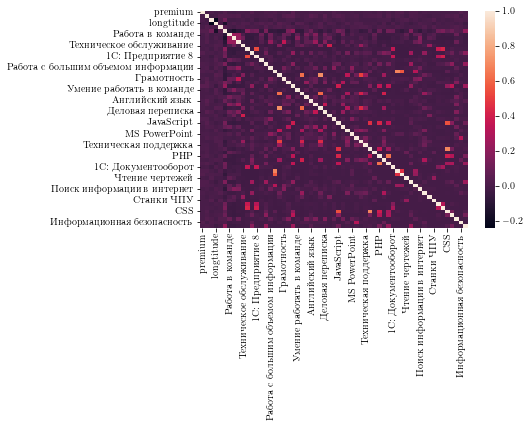

In [68]:
corr_mat = df.corr()
sns.heatmap(corr_mat)

<AxesSubplot:>

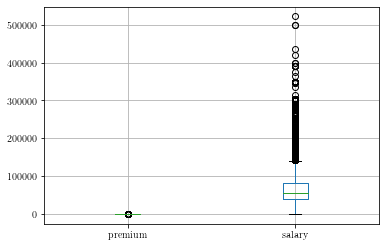

In [75]:
df.boxplot(column=['premium','salary'])

In [79]:
df

,premium,name,response_letter_required,latitude,longtitude,experience,has_test,currency,salary,Region,Работа в команде,Пользователь ПК,Грамотная речь,Техническое обслуживание,1С программирование,Linux,1С: Предприятие 8,Работа в условиях многозадачности,SQL,Работа с большим объемом информации,Adobe Photoshop,Настройка ПК,Грамотность,Управление проектами,Git,Умение работать в команде,Настройка сетевых подключений,Организаторские навыки,Английский язык,Деловое общение,Настройка ПО,Деловая переписка,Ремонтные работы,Аналитическое мышление,JavaScript,Ведение переговоров,Windows 7,MS PowerPoint,Информационные технологии,Ремонт ПК,Техническая поддержка,HTML,Точность и внимательность к деталям,PHP,Администрирование сетевого оборудования,MySQL,1С: Документооборот,Adobe Illustrator,CorelDRAW,Чтение чертежей,Python,Креативность,Поиск информации в интернет,TCP/IP,Монтаж оборудования,Станки ЧПУ,1С: Управление Торговлей,1С: Зарплата и управление персоналом,CSS,ООП,Деловая коммуникация,Информационная безопасность,PostgreSQL
0,False,"Консультант входящей линии ""Сети гипермаркетов...",0,56.840557,53.202489,Нет опыта,0,RUR,32000.0,Волго-Камский,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,False,Аналитик,0,56.325759,44.015742,От 1 года до 3 лет,0,RUR,34800.0,Волго-Камский,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,False,Системный администратор,0,47.269060,39.759832,От 1 года до 3 лет,0,RUR,37410.0,Южный,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,False,Инженер - программист 1С,0,55.071494,73.296086,От 1 года до 3 лет,0,RUR,60900.0,Южно-Сибирский,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,False,Сервисный инженер по обслуживанию систем пожар...,0,57.562586,39.822900,От 1 года до 3 лет,0,RUR,80000.0,Центральный,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20139,False,Менеджер по продукту/Продукт менеджер,0,60.000488,30.335263,От 1 года до 3 лет,0,RUR,184875.0,Северно-Западный,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
20140,False,Менеджер - аналитик по маркетплейсам,0,57.792257,40.921953,От 1 года до 3 лет,0,RUR,40000.0,Центральный,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
20141,False,Главный специалист (системный администратор),0,61.252481,73.419766,От 3 до 6 лет,0,RUR,51330.0,Уральско-Сибирский,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
20142,False,Токарь,0,54.536298,39.778209,От 1 года до 3 лет,0,RUR,39150.0,Центральный,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


KeyError: "['c'] not in index"

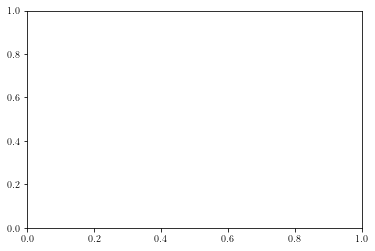

In [93]:
df_q = df[['response_letter_required','latitude','longtitude']
for column in 
    df.boxplot(column=['c','salary'])